<a href="https://colab.research.google.com/github/erenayar-12/DSA210-Project/blob/main/DSA210_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [ ]:
from os.path import join

In [ ]:
data_path = "/content/gdrive/My Drive"
filename = "all_data.csv"


In [ ]:
df = pd.read_csv(join(data_path, filename), delimiter=",")

for col in ['Suicide', 'Theatre', 'Opera', 'Cinema']:
    df[col] = df[col].astype(str).str.replace(" ", "").astype(int) #in the original data, there are spaces between thousands and millions so I erased them with this code in order to calculate correctly
df

,Year,Suicide,Theatre,Opera,Cinema
0,2023,4061,6279512,275086,31005844
1,2022,4218,5451627,211233,35754644
2,2021,4194,714864,14032,12418777
3,2020,3710,4492293,256063,17226952
4,2019,3476,7899547,322189,56479209
5,2018,3342,7841353,293002,64772380
6,2017,3168,7006410,281069,68482526
7,2016,3193,6016762,272578,55260600
8,2015,3246,5853445,337007,57148011
9,2014,3169,6076128,400420,55378716


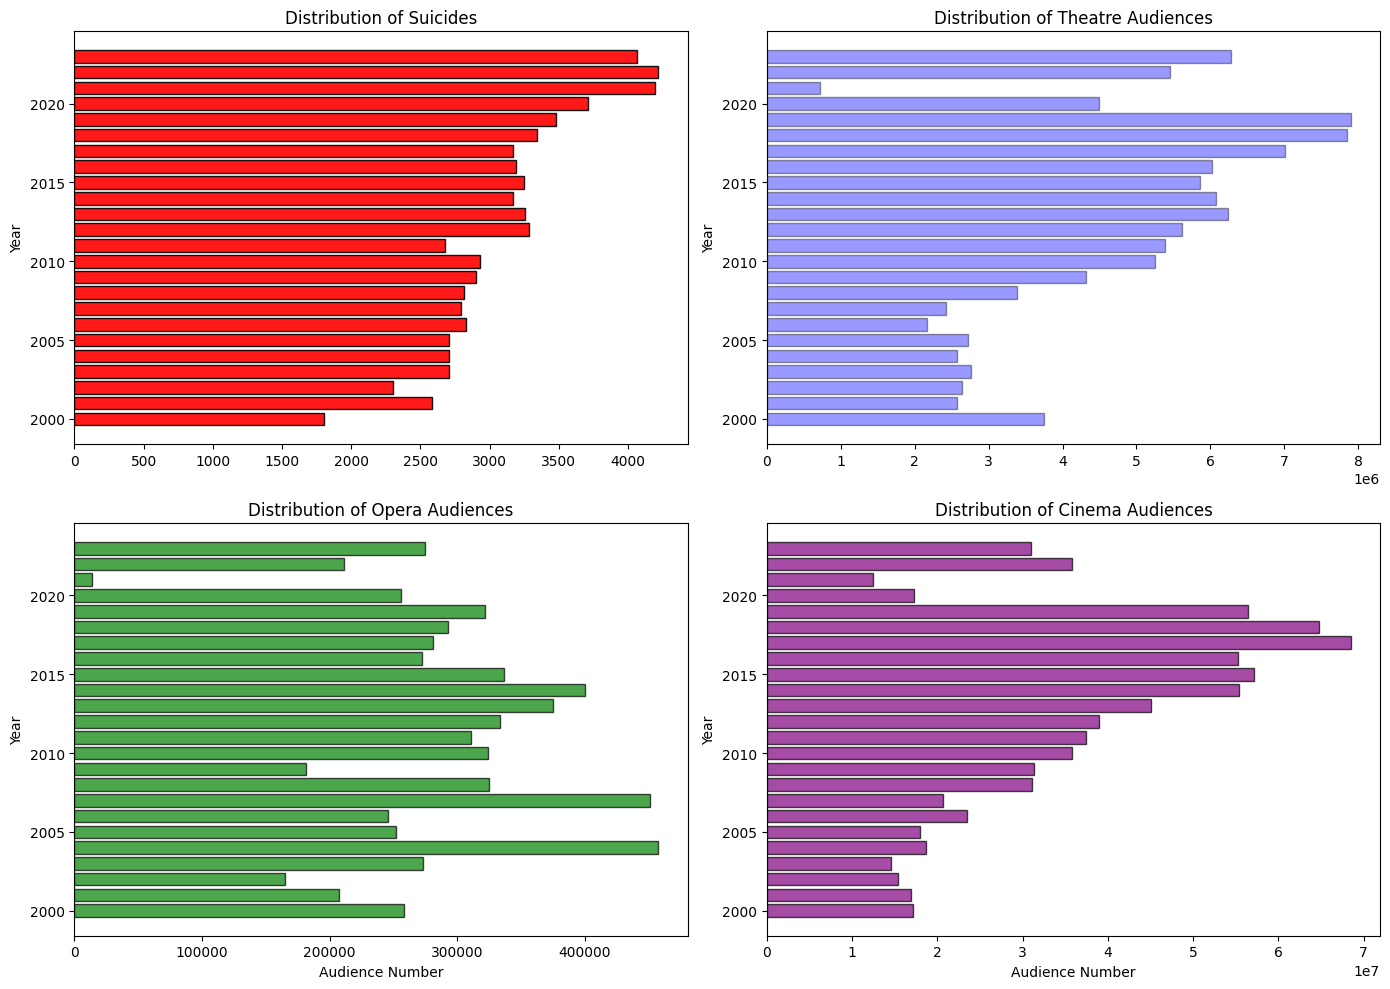

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

bins = 10

axes[0, 0].barh(df['Year'], df["Suicide"], color="red", alpha=0.9, edgecolor="black")
axes[0, 0].set_title("Distribution of Suicides")
axes[0, 0].set_ylabel("Year")

# Top right: Theatre audiences
axes[0, 1].barh(df['Year'], df["Theatre"], color="blue", alpha=0.4, edgecolor="black")
axes[0, 1].set_title("Distribution of Theatre Audiences")
axes[0, 1].set_ylabel("Year")

# Bottom left: Opera audiences
axes[1, 0].barh(df['Year'], df["Opera"], color="green", alpha=0.7, edgecolor="black")
axes[1, 0].set_title("Distribution of Opera Audiences")
axes[1, 0].set_ylabel("Year")
axes[1, 0].set_xlabel("Audience Number")

# Bottom right: Cinema audiences
axes[1, 1].barh(df['Year'], df["Cinema"], color="purple", alpha=0.7, edgecolor="black")
axes[1, 1].set_title("Distribution of Cinema Audiences")
axes[1, 1].set_ylabel("Year")
axes[1, 1].set_xlabel("Audience Number")

# Adjust layout
plt.tight_layout()
plt.show()

HYPOTHESIS TESTING:

Null Hypothesis (H0) : There is no correlation between cultural activities and numbers of suicides.

Alternative Hypothesis (H1): There is a negative correlation between cultural activities and numbers of suicides.

Now we will check those hypothesis via Pearson Coefficients.


In [78]:
theatre = df['Theatre']
opera = df['Opera']
cinema = df['Cinema']
suicide = df['Suicide']

r_theatre, p_value_theatre = stats.pearsonr(suicide, theatre)
r_opera, p_value_opera = stats.pearsonr(suicide, opera)
r_cinema, p_value_cinema = stats.pearsonr(suicide, cinema)

print(f"Pearson Correlation Coefficient (Theatre): {r_theatre:.4f}")
print(f"p-value (Theatre): {p_value_theatre:.4f}")
print(f"Pearson Correlation Coefficient (Opera): {r_opera:.4f}")
print(f"p-value (Opera): {p_value_opera:.4f}")
print(f"Pearson Correlation Coefficient (Cinema): {r_cinema:.4f}")
print(f"p-value (Cinema): {p_value_cinema:.4f}")

Pearson Correlation Coefficient (Theatre): 0.3311
p-value (Theatre): 0.1140
Pearson Correlation Coefficient (Opera): -0.2265
p-value (Opera): 0.2871
Pearson Correlation Coefficient (Cinema): 0.2808
p-value (Cinema): 0.1837


When we look at p-values we see that they all greater than 0.05, so we fail to reject null hypothesis.

By looking at r-values:

For Theatre and Cinema, there are weak positive correlation.

For Opera there is a weak negative correlation


When we consider all weak correlations may be due to other factor or by chance.
